In [1]:
# Load in necessary packages

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(".././Data/processed/movies_model.csv")

### Gross Revenue over Time

In [2]:
fig = px.line(df.sort_values('year'), x='year', y='gross',
              title='Gross Revenue Over Time',
              markers=True)
fig.update_layout(xaxis_title='Year', yaxis_title='Gross Revenue')
fig.show()

### Budget vs Gross Scatterplot with Genre Coloring

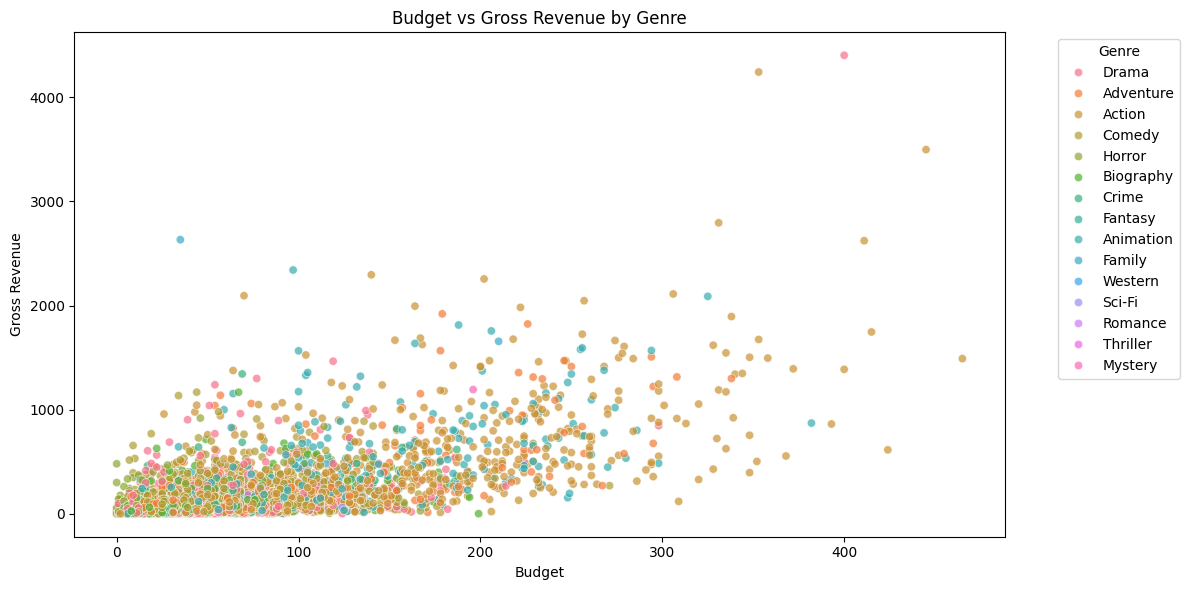

In [3]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='budget', y='gross', hue='genre', alpha=0.7)
plt.title('Budget vs Gross Revenue by Genre')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Correlation Heatmap for Numeric Features

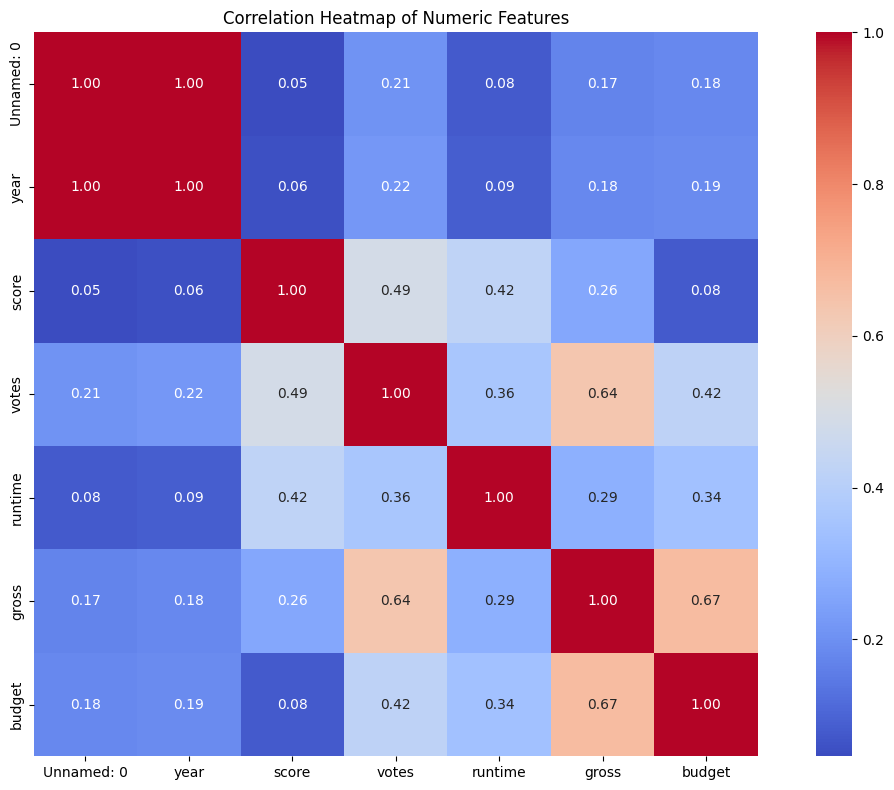

In [4]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

### Top Genres Over Decades

In [5]:
# Step 1: Group and count genres per decade
genre_counts = (
    df.groupby(['decade', 'genre'])
    .size()
    .reset_index(name='count')
)

# Step 2: Filter top genres per decade (optional: top 5 per decade)
top_genres = (
    genre_counts
    .sort_values(['decade', 'count'], ascending=[True, False])
    .groupby('decade')
    .head(5)
)

# Step 3: Plot
fig = px.bar(
    top_genres,
    x='decade',
    y='count',
    color='genre',
    barmode='group',
    title='Top Genres Over the Decades',
    labels={'count': 'Number of Movies', 'decade': 'Decade'}
)

fig.update_layout(xaxis=dict(type='category'))
fig.show()

In [6]:
fig.write_image("../figures/genres_over_decades.png")

### Budget vs. Gross Scatterplots by Rating

In [8]:
fig = px.scatter(
    df,
    x='budget',
    y='gross',
    color='rating',
    hover_data=['name', 'year', 'genre'],
    title='Budget vs Gross by Rating',
    labels={
        'budget': 'Adjusted Budget (USD)',
        'gross': 'Adjusted Gross (USD)',
        'rating': 'MPAA Rating'
    }
)

fig.update_layout(template='plotly_white')
fig.show()

###### I think we should consider reducing the number of ratings we consider to the major movie ones shown in theatres (G, PG, PG-13, R) but like the earlier one I included everything in this first draft

In [9]:
fig.write_image("../figures/budget_vs_gross_rating.png")

### Feature Importance Plots

In [10]:
import sys
from pathlib import Path

# Add parent directory to sys.path
sys.path.append(str(Path('.').resolve().parent))

In [11]:
# Import your utilities
from apputil import load_data, train_baseline

# Load data and train model
df = load_data()
model, feature_cols, r2 = train_baseline(df)

# Get feature importances
importances = model.feature_importances_

Training completed with 27 features
R2 Score: 0.064, RMSE: $286.95


In [23]:
import plotly.express as px
import pandas as pd

# Create DataFrame of feature importances
feat_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
})

# Filter to only features with importance > 0
feat_df = feat_df[feat_df['Importance'] > 0].sort_values(by='Importance', ascending=True)  # ascending for horizontal bar

# Create Plotly horizontal bar chart
fig = px.bar(
    feat_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importance of Tuned Model',
    labels={'Importance': 'Importance', 'Feature': 'Feature'},
    color_discrete_sequence=['steelblue']
)

# Improve layout
fig.update_layout(
    xaxis_title='Importance',
    yaxis_title='Feature',
    margin=dict(l=100, r=20, t=50, b=50),
    height=600
)

# Show the figure
fig.show()

In [25]:
fig.write_image("../figures/improved/feature_importance_tuned_model.png")

### Genre - Based Performance

In [26]:
import plotly.graph_objects as go
import pandas as pd

# Load your data
df = load_data()

# Group by genre and calculate average gross
genre_perf = df.groupby('genre')['gross'].mean().sort_values(ascending=False)

# Create Plotly bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=genre_perf.index,
    y=genre_perf.values,
    marker_color='coral',
    text=[f'${v:,.0f}' for v in genre_perf.values],  # Data labels
    textposition='outside'
))

# Customize layout
fig.update_layout(
    title='Average Gross by Genre',
    xaxis_title='Genre',
    yaxis_title='Average Gross (Millions USD)',
    xaxis_tickangle=-45,
    height=600,
    margin=dict(l=60, r=30, t=60, b=100)
)

# Show figure
fig.show()


In [27]:
fig.write_image("../figures/improved/genre_based_performance.png")